# <<  Part 3  Machine Learning Model>>

##         Libraries

In [27]:
import os
import cv2
import seaborn
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

##  3.1 Data  Augmentation...

For Trainning Set

In [6]:
image_folder = r"C:\Users\Nimra Amer\Desktop\project\traffic_lights_3\train\images(train)" #For Trainning Set

# Iterate over each file in the folder
for filename in os.listdir(image_folder):
    if filename.endswith(".jpeg") or filename.endswith(".jpg") or filename.endswith(".png"):
        # Read the original image
        image_path = os.path.join(image_folder, filename)
        original_image = cv2.imread(image_path)

        # Determine orientation
        orientation = determine_traffic_signal_orientation(image_path)

        # Apply orientation-aware augmentation
        augmented_image = apply_orientation_aware_augmentation(original_image, orientation)

        # Adjust brightness and contrast
        brightness_factor = 1.5  # Adjust as needed
        contrast_factor = 1.2    # Adjust as needed
        adjusted_image = adjust_brightness_contrast(augmented_image, brightness_factor, contrast_factor)

        # Apply orientation-aware augmentation again (if needed)
        result_image_train = apply_orientation_aware_augmentation(adjusted_image, orientation)

For Testing Set

In [7]:
image_folder = r'C:\Users\Nimra Amer\Desktop\project\traffic_lights_3\test\images2(test)' #For Testing Set

# Iterate over each file in the folder
for filename in os.listdir(image_folder):
    if filename.endswith(".jpeg") or filename.endswith(".jpg") or filename.endswith(".png"):
        # Read the original image
        image_path = os.path.join(image_folder, filename)
        original_image = cv2.imread(image_path)

        # Determine orientation
        orientation = determine_traffic_signal_orientation(image_path)

        # Apply orientation-aware augmentation
        augmented_image = apply_orientation_aware_augmentation(original_image, orientation)

        # Adjust brightness and contrast
        brightness_factor = 1.5  # Adjust as needed
        contrast_factor = 1.2    # Adjust as needed
        adjusted_image = adjust_brightness_contrast(augmented_image, brightness_factor, contrast_factor)

        # Apply orientation-aware augmentation again (if needed)
        result_image_test = apply_orientation_aware_augmentation(adjusted_image, orientation)


Logistic Regression for Augumented Image

In [12]:
def load_labels_from_folder(folder):
    labels = []
    for filename in os.listdir(folder):
        path = os.path.join(folder, filename)
        label = int('signal' in filename)  #Distribution in classes
        labels.append(label)
    return np.array(labels)

# Paths for training and testing labels
train_labels_folder = r"C:\Users\Nimra Amer\Desktop\project\traffic_lights_3\train\labels"
test_labels_folder = r"C:\Users\Nimra Amer\Desktop\project\traffic_lights_3\test\labels"

# Load labels
y_train = load_labels_from_folder(train_labels_folder)
y_test = load_labels_from_folder(test_labels_folder)

# Check if labels were loaded
if len(y_train) == 0 or len(y_test) == 0:
    print("No labels found in the specified folders.")
else:
    scaler = StandardScaler()    # Resizing and Flattening the images to get the efficient output
    new_width, new_height = 100, 100  
    flattened_images_train = [cv2.resize(img, (new_width, new_height)).flatten() for img in result_image_train]
    flattened_images_test = [cv2.resize(img, (new_width, new_height)).flatten() for img in result_image_test]

    X_train_scaled = scaler.fit_transform(flattened_images_train)
    X_test_scaled = scaler.transform(flattened_images_test)

    # Ensure the number of labels matches the number of samples
    y_train = y_train[:len(X_train_scaled)]

    X_train_final, X_val, y_train_final, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

    # Implementing Logistic Regression
    model = LogisticRegression()
    model.fit(X_train_final, y_train_final)
    y_pred = model.predict(X_val)

    # Evaluating the model
    accuracy = accuracy_score(y_val, y_pred)
    print("Accuracy : " , accuracy * 100 , "%")
    
    #Test Data
    y_test_pred = model.predict(X_test_scaled)
    num_augmentations_per_sample = 5  
    y_test_pred = np.repeat(y_test_pred, num_augmentations_per_sample)
    y_test_pred = y_test_pred[:len(y_test)]

    # Evaluate the model on the testing set
    accuracy_test = accuracy_score(y_test, y_test_pred)
    print("Accuracy of The Testing Images:", accuracy_test*100 , "%")


Accuracy :  80.0 %
Accuracy of The Testing Images: 5.460750853242321 %


## 3.2  normalization

For Trainning Set

In [15]:
image_folder = r"C:\Users\Nimra Amer\Desktop\project\traffic_lights_3\train\images(train)" #For Trainning Set

for filename in os.listdir(image_folder):
    if filename.endswith(".jpeg") or filename.endswith(".jpg") or filename.endswith(".png"):
        # Read the original image
        image_path = os.path.join(image_folder, filename)
        original_image = cv2.imread(image_path)

        # Determine orientation
        result_normalize_train = pixel_normalization(original_image)

For Testing Set

In [16]:
image_folder = r'C:\Users\Nimra Amer\Desktop\project\traffic_lights_3\test\images2(test)' #For Testing Set

for filename in os.listdir(image_folder):
    if filename.endswith(".jpeg") or filename.endswith(".jpg") or filename.endswith(".png"):
        # Read the original image
        image_path = os.path.join(image_folder, filename)
        original_image = cv2.imread(image_path)

        # Determine orientation
        result_normalize_test = pixel_normalization(original_image)

Logistic Regression For Normalization

In [18]:
def load_labels_from_folder(folder):
    labels = []
    for filename in os.listdir(folder):
        path = os.path.join(folder, filename)
        label = int('signal' in filename)  #Distribution in classes
        labels.append(label)
    return np.array(labels)

# Paths for training and testing labels
train_labels_folder = r"C:\Users\Nimra Amer\Desktop\project\traffic_lights_3\train\labels"
test_labels_folder = r"C:\Users\Nimra Amer\Desktop\project\traffic_lights_3\test\labels"

# Load labels
y_train = load_labels_from_folder(train_labels_folder)
y_test = load_labels_from_folder(test_labels_folder)

# Check if labels were loaded
if len(y_train) == 0 or len(y_test) == 0:
    print("No labels found in the specified folders.")
else:
    scaler = StandardScaler()    # Resizing and Flattening the images to get the efficient output
    new_width, new_height = 100, 100  
    flattened_images_train = [cv2.resize(img, (new_width, new_height)).flatten() for img in result_normalize_train]
    flattened_images_test = [cv2.resize(img, (new_width, new_height)).flatten() for img in result_normalize_test]

    X_train_scaled = scaler.fit_transform(flattened_images_train)
    X_test_scaled = scaler.transform(flattened_images_test)

    # Ensure the number of labels matches the number of samples
    y_train = y_train[:len(X_train_scaled)]

    X_train_final, X_val, y_train_final, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

    # Implementing Logistic Regression
    model = LogisticRegression()
    model.fit(X_train_final, y_train_final)
    y_pred = model.predict(X_val)

    # Evaluating the model
    accuracy = accuracy_score(y_val, y_pred)
    print("Accuracy : " , accuracy*100 , "%")

    #Test Data
    y_test_pred = model.predict(X_test_scaled)
    num_normalization_per_sample = 2
    y_test_pred = np.repeat(y_test_pred, num_normalization_per_sample)
    y_test_pred = y_test_pred[:len(y_test)]

    # Evaluate the model on the testing set
    accuracy_test = accuracy_score(y_test, y_test_pred)
    print("Accuracy of The Testing Images:", accuracy_test*100 , "%")



Accuracy :  99.21875 %
Accuracy of The Testing Images: 69.28327645051195 %


## 3.3 Anchor Boxes

For Trainning Set

In [21]:
image_folder = r"C:\Users\Nimra Amer\Desktop\project\traffic_lights_3\train\images(train)" #For Trainning Set

for filename in os.listdir(image_folder):
    if filename.endswith(".jpeg") or filename.endswith(".jpg") or filename.endswith(".png"):
        # Read the original image
        image_path = os.path.join(image_folder, filename)
        original_image = cv2.imread(image_path)

        # Determine orientation
        scale_factor = 1.2
        result_train_image = estimate_anchor_boxes(image_path, scale_factor)


For Testing Set

In [22]:
image_folder = r"C:\Users\Nimra Amer\Desktop\project\traffic_lights_3\test\images2(test)" #For Trainning Set

for filename in os.listdir(image_folder):
    if filename.endswith(".jpeg") or filename.endswith(".jpg") or filename.endswith(".png"):
        # Read the original image
        image_path = os.path.join(image_folder, filename)
        original_image = cv2.imread(image_path)

        # Determine orientation
        scale_factor = 1.2
        result_test_image = estimate_anchor_boxes(image_path, scale_factor)

Logistic Regression For Anchor Boxes

In [23]:
def load_labels_from_folder(folder):
    labels = []
    for filename in os.listdir(folder):
        path = os.path.join(folder, filename)
        label = int('signal' in filename)   #Distribution in classes
        labels.append(label)
    return np.array(labels)

train_labels_folder = r"C:\Users\Nimra Amer\Desktop\project\traffic_lights_3\train\labels"
test_labels_folder = r"C:\Users\Nimra Amer\Desktop\project\traffic_lights_3\test\labels"

# Loading labels
y_train = load_labels_from_folder(train_labels_folder)
y_test = load_labels_from_folder(test_labels_folder)

# Condition for effective and accurate trainning and testing
if len(y_train) == 0 or len(y_test) == 0:
    print("No labels found in the specified folders.")
else:
    scaler = StandardScaler()    # Resizing and Flattening the images to get the efficient output
    new_width, new_height = 100, 100  
    flattened_images_train = [cv2.resize(img, (new_width, new_height)).flatten() for img in result_train_image]
    flattened_images_test = [cv2.resize(img, (new_width, new_height)).flatten() for img in result_test_image]

    X_train_scaled = scaler.fit_transform(flattened_images_train)
    X_test_scaled = scaler.transform(flattened_images_test)

    y_train = y_train[:len(X_train_scaled)] #Ensuring that the sizes are same

    X_train_final, X_val, y_train_final, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

    # Implementing Logistic Regression
    model = LogisticRegression()
    model.fit(X_train_final, y_train_final)
    y_pred = model.predict(X_val)

    # Evaluating the model
    accuracy = accuracy_score(y_val, y_pred)
    print("Accuracy : " , accuracy*100 , "%")

    #Test Data
    y_test_pred = model.predict(X_test_scaled)
    num_normalization_per_sample = 2
    y_test_pred = np.repeat(y_test_pred, num_normalization_per_sample)
    y_test_pred = y_test_pred[:len(y_test)]

    # Evaluate the model on the testing set
    accuracy_test = accuracy_score(y_test, y_test_pred)
    print("Accuracy of The Testing Images:", accuracy_test*100 , "%")


Accuracy :  99.21875 %
Accuracy of The Testing Images: 39.70420932878271 %


# <<  Part 4  Visualizing Models>>

4.1 Augumented Images

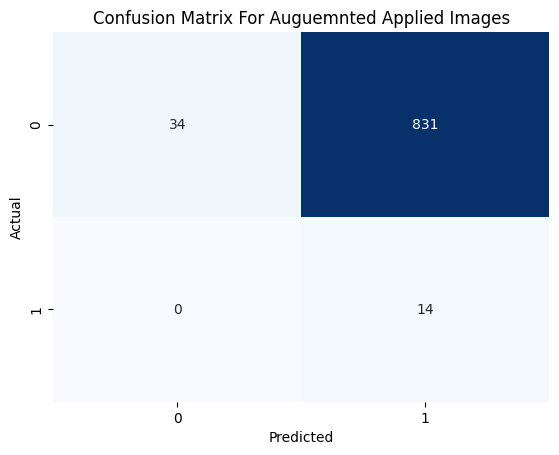

In [13]:
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix For Auguemnted Applied Images")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

4.2 Normalizaed(Original) Images

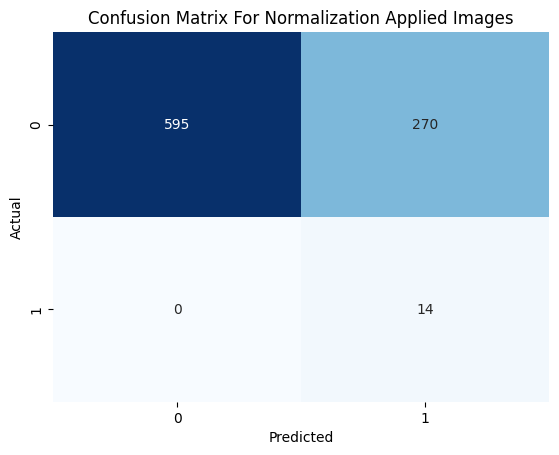

In [19]:
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix For Normalization Applied Images")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

4.3 Anchor Box Images

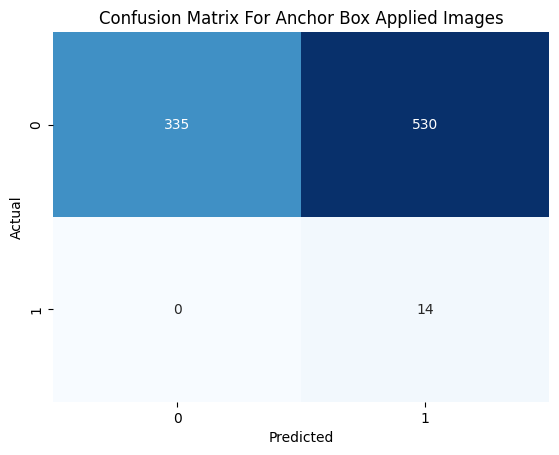

In [28]:
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix For Anchor Box Applied Images")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()